# Метод опорных векторов

Метод опорных векторов SVM - алгоритм машинного обучения, используемый для решения задач классификации, регрессии и обнаружения выбросов.

Случай линейно разделимых классов - ищет разделяющую гиперплоскость, максимально отдаленную от обоих классов.

Случай линейно неразделимых классов - вводятся доп переменные, характеризующие допустимые ошибку классификации. Используется переход от скалярного произведения к нелинейной функции ядра, это позволяет перейти в пространство большей размерности, где выборка может быть линейно разделена.

Три вида ядер:

*   Линейное ядро (kernel='linear') - строит гиперплоскость для разделения данных и подходит для линейно разделимых классов. Если классы пересекаются, используется мягкий зазор (soft margin), допускающий ошибки классификации.
*   Радиальное базисное ядро (kernel='rbf') - установлено по умолчанию, может разделять линейно неразделимые данные. Создает границу в виде радиально-симметричного колокола.
*   Ядро с полиномиальной функцией (kernel='poly') - вводит полиномиальную функцию в пространство признаков для разделения данных.




## Из методички

In [1]:
from sklearn.datasets import make_blobs
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np

**Линейно разделимые данные**

In [2]:
X, y = make_blobs(n_features=2, n_samples=30, centers=2, random_state=5, cluster_std=0.4)
# датасет двумерный (2 признака), 30 точек в датасете, 2 кластера (задача бинарной классификации), разброс точек 0.4


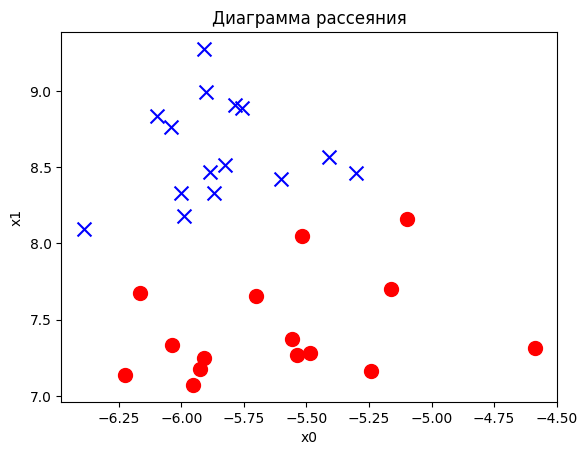

In [3]:
plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния")
plt.xlabel('x0')
plt.ylabel('x1')
plt.show()

In [4]:
from sklearn.svm import SVC

In [5]:
svm_linear = SVC(kernel='linear', C=100) # высокое значение С задает жесткий зазор между классами
svm_linear.fit(X, y)

SVC(C=100, kernel='linear')

In [6]:
svm_linear.coef_

array([[-2.49920793,  6.14683189]])

In [7]:
svm_linear.intercept_

array([-64.2533988])

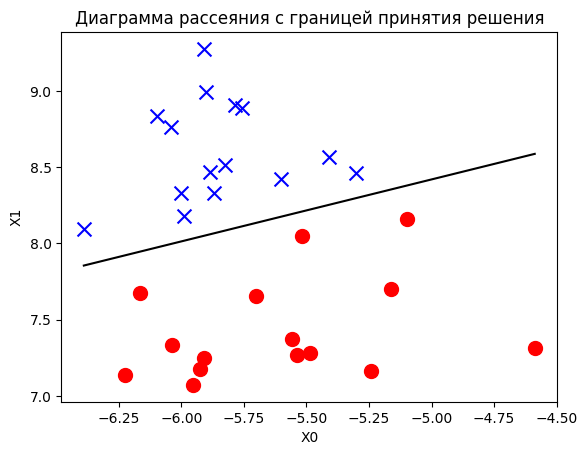

In [8]:
X0 = np.linspace(X[:, 0].min(),X[:, 0].max(), X.shape[0])

plt.plot(X0,-svm_linear.intercept_[0]/svm_linear.coef_[0][1]-svm_linear.coef_[0][0]/svm_linear.coef_[0][1]*X0, c='k')

plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния c границей принятия решения")
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

Опорные вектора - наиболее близкие к другому классу точки.

In [9]:
svm_linear.support_vectors_ # координаты опорных векторов

array([[-5.51629264,  8.04763857],
       [-5.30025769,  8.46071981],
       [-5.9879581 ,  8.18112559]])

In [10]:
svm_linear.support_ # индексы опорных векторов в исходном наборе данных

array([ 0,  8, 29], dtype=int32)

In [11]:
svm_linear.n_support_ # количество опорных векторов

array([1, 2], dtype=int32)

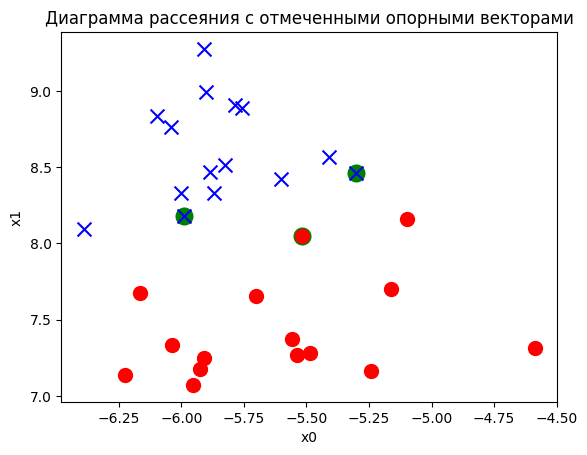

In [12]:
plt.scatter(svm_linear.support_vectors_[:, 0],svm_linear.support_vectors_[:, 1], linewidth=7, facecolors='green')

plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния c отмеченными опорными векторами")
plt.xlabel('x0')
plt.ylabel('x1')
plt.show()

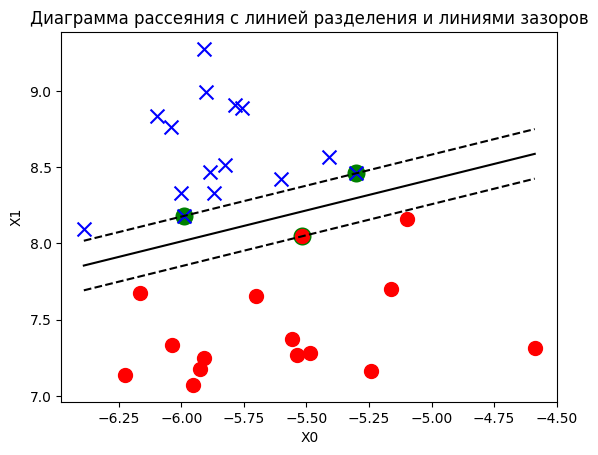

In [13]:
plt.plot(X0,-svm_linear.intercept_[0]/svm_linear.coef_[0][1]-svm_linear.coef_[0][0]/svm_linear.coef_[0][1]*X0, c='k')

plt.plot(X0,(-svm_linear.intercept_[0]-1)/svm_linear.coef_[0][1]-svm_linear.coef_[0][0]/svm_linear.coef_[0][1]*X0,linestyle='--', c='k')
plt.plot(X0,(-svm_linear.intercept_[0]+1)/svm_linear.coef_[0][1]-svm_linear.coef_[0][0]/svm_linear.coef_[0][1]*X0,linestyle='--', c='k')

plt.scatter(svm_linear.support_vectors_[:, 0],svm_linear.support_vectors_[:, 1], linewidth=7, facecolors='green')

plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния c линией разделения и линиями зазоров")
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

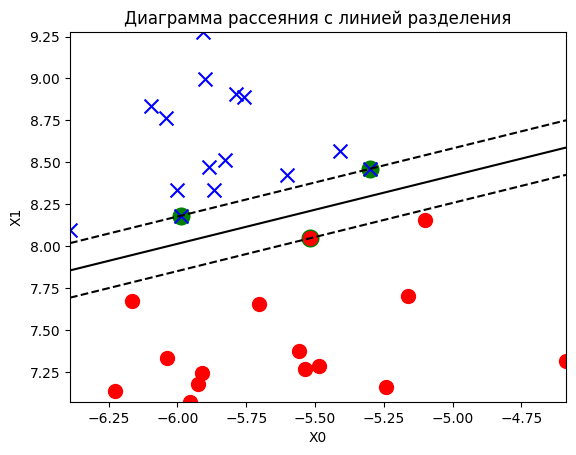

In [14]:
X0 = np.linspace(X[:, 0].min(), X[:, 0].max(), X.shape[0])
X1 = np.linspace(X[:, 1].min(), X[:, 1].max(), X.shape[0])

X0_grid, X1_grid = np.meshgrid(X0, X1)
Z = svm_linear.intercept_[0] + svm_linear.coef_[0][0] * X0_grid +  svm_linear.coef_[0][1] * X1_grid
plt.contour(X0_grid, X1_grid, Z, colors='k', levels=[-1, 0, 1], linestyles=['--', '-', '--'])

plt.scatter(svm_linear.support_vectors_[:, 0],svm_linear.support_vectors_[:, 1], linewidth=7, facecolors='green')

plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния c линией разделения")
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

In [15]:
def plot_decision_regions(X, y, model):
    plt.scatter(model.support_vectors_[:, 0],model.support_vectors_[:, 1], linewidth=7, facecolors='green')

    plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
    plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

    X0 = np.linspace(X[:, 0].min(),X[:, 0].max(), X.shape[0])
    X1 = np.linspace(X[:, 1].min(),X[:, 1].max(), X.shape[0])

    X0_grid, X1_grid = np.meshgrid(X0, X1)
    Z = model.decision_function(np.array([X0_grid.ravel(), X1_grid.ravel()]).T).reshape(X0_grid.shape)
    plt.contour(X0_grid, X1_grid, Z, colors='k', levels=[-1, 0, 1], linestyles=['--', '-', '--'])
    plt.contourf(X0_grid, X1_grid, Z, colors='k', levels=[-1, 0, 1], alpha=0.5)

    plt.title("Диаграмма рассеяния c линией разделения и зазором")
    plt.xlabel('X0')
    plt.ylabel('X1')
    plt.show()

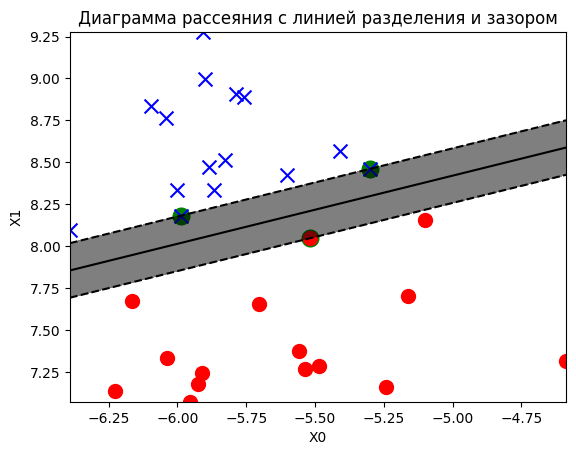

In [16]:
plot_decision_regions(X, y, svm_linear)

In [17]:
y_pred =  svm_linear.predict(X) # вектор предсказанных значений целевой переменной

In [18]:
from sklearn import metrics

In [19]:
metrics.accuracy_score(y, y_pred)

1.0

In [20]:
metrics.confusion_matrix(y, y_pred)

array([[15,  0],
       [ 0, 15]])

In [21]:
observation_new = [[-5.25, 7.5]] # новая точка данных

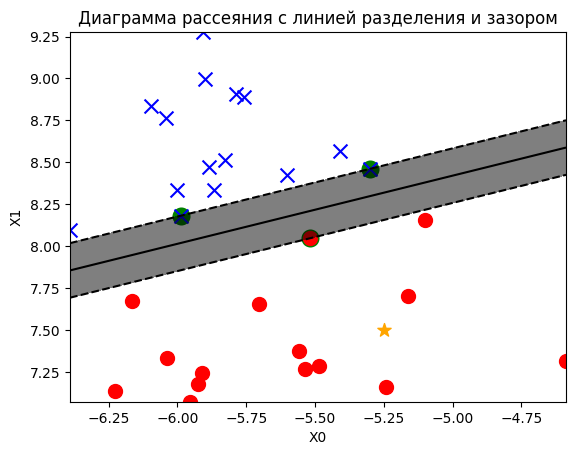

In [22]:
plt.scatter(observation_new[0][0], observation_new[0][1], marker='*', s=100, color='orange')
plot_decision_regions(X, y, svm_linear)

In [23]:
svm_linear.decision_function(observation_new)

array([-5.03131797])

In [24]:
svm_linear.predict(observation_new)

array([0])

**Линейно неразделимые данные с зазором**

In [25]:
from sklearn.datasets import make_circles

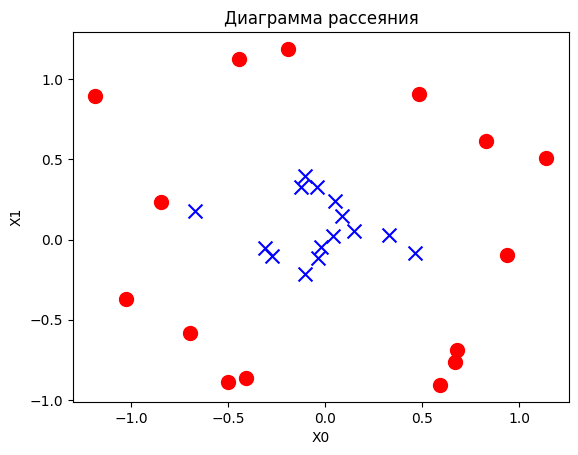

In [26]:
X, y = make_circles(n_samples=30, random_state=5, factor=.1, noise=.2)
# 30 точек в выборке, случайность для воспроизводимости, внутренний круг в 10 раз меньше внешнего, шум к точкам (чтобы классы частично пересекались)

plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния")
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

In [27]:
svm_rbf = SVC(kernel='rbf', C=100).fit(X, y)

In [28]:
svm_rbf.n_support_
svm_rbf.support_
svm_rbf.support_vectors_

array([[ 0.9388294 , -0.09554628],
       [-0.84682371,  0.23287306],
       [-0.19166925,  1.18895776],
       [-0.69539045, -0.58523359],
       [ 0.68060508, -0.68615145],
       [ 0.48354792,  0.91063288],
       [-0.66975235,  0.17866445],
       [ 0.46427295, -0.08540628]])

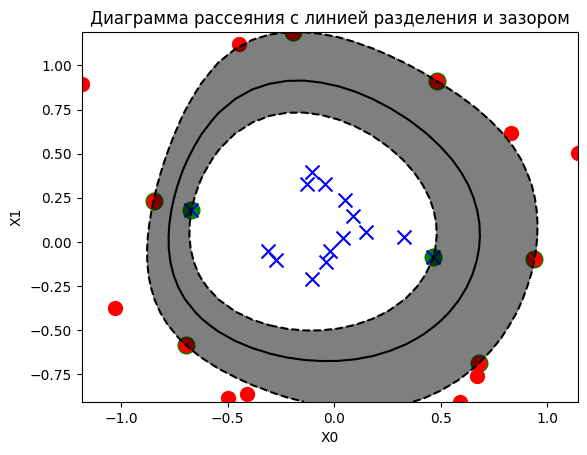

In [29]:
plot_decision_regions(X, y, svm_rbf)

In [30]:
metrics.accuracy_score(y, y_pred)

0.4666666666666667

In [31]:
metrics.confusion_matrix(y, y_pred)

array([[7, 8],
       [8, 7]])

Низкое качество классификации, точность низкая, матрица ошибок почти симметрична (модель путает классы одинаково часто).

**Данные без зазора**

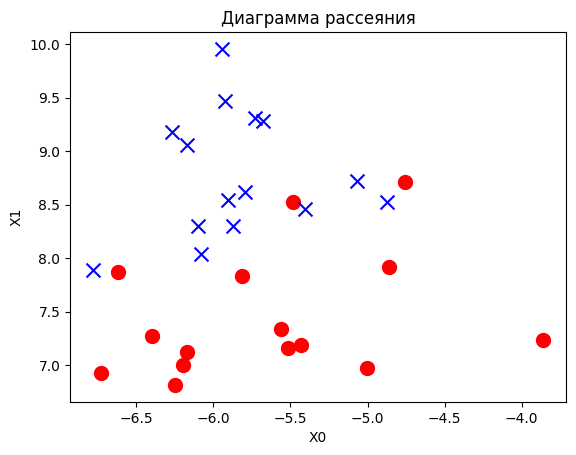

In [32]:
X, y = make_blobs(n_features=2, n_samples=30, centers=2, random_state=5, cluster_std=0.7)

plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния")
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

In [33]:
svm_poly = SVC(kernel='poly', degree=4, C=2).fit(X, y) # уменьшение параметра регуляризации С - мягкий зазор

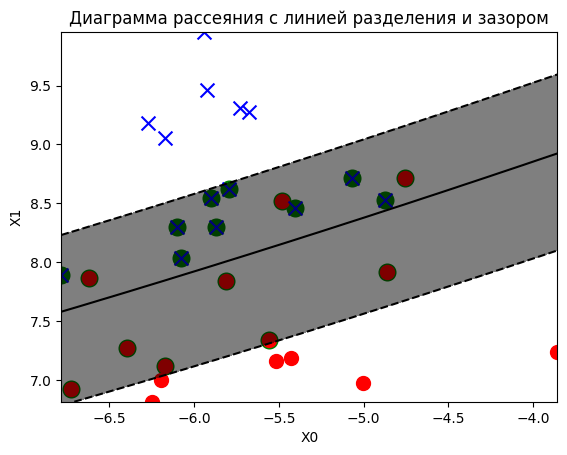

In [34]:
plot_decision_regions(X, y, svm_poly)

In [35]:
svm_poly.n_support_

array([9, 9], dtype=int32)

In [36]:
metrics.accuracy_score(y, y_pred)

1.0

In [37]:
metrics.confusion_matrix(y, y_pred)

array([[15,  0],
       [ 0, 15]])

Данная модель справляется с классификацией.

## Задания для самостоятельного выполнения

*1. В первом задании поэкспериментируйте с различными значениями аргумента C класса SVC. Сделайте вывод о том, как он влияет на модель классификации.*

In [38]:
from sklearn.metrics import accuracy_score

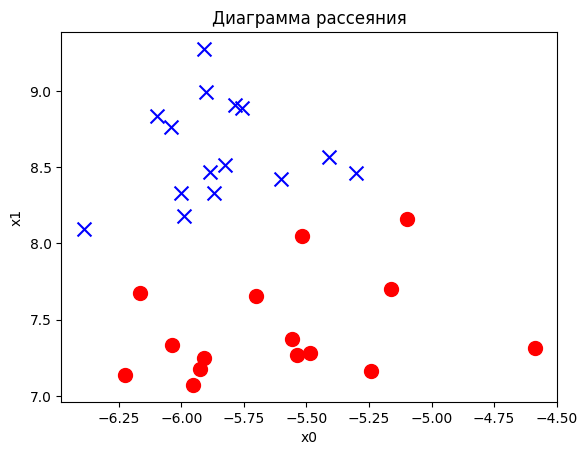

C: 0.01, Accuracy: 1.0000
C: 0.1, Accuracy: 0.9667
C: 1, Accuracy: 0.9667
C: 10, Accuracy: 1.0000
C: 100, Accuracy: 1.0000


In [39]:
X, y = make_blobs(n_features=2, n_samples=30, centers=2, random_state=5, cluster_std=0.4)

plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния")
plt.xlabel('x0')
plt.ylabel('x1')
plt.show()


C_values = [0.01, 0.1, 1, 10, 100]
accuracies = []

for C in C_values:
    model = SVC(C=C, kernel='linear')
    model.fit(X, y)
    y_pred = model.predict(X)
    acc = accuracy_score(y, y_pred)
    accuracies.append(acc)


for i in range(len(accuracies)):
  print(f"C: {C_values[i]}, Accuracy: {accuracies[i]:.4f}")


Для линейно разделимых данных SVM с линейным ядром работает хорошо. При низких значениях точность чуть падает, но остается высокой, т.к. данные не сложны для разделения. Средние - небольшое снижение точности, возможно ухудшение баланса между ошибками и зазором. Высокие значения обеспечивают 100% точности.

*2. В первом задании подвигайте точку нового предсказания. Убедитесь, что с другой стороны границы предсказывается другой класс. Как изменяется предсказание, если точка ляжет внутрь полосы зазора?*

In [40]:
def plot_decision_regions(X, y, model):
    plt.scatter(model.support_vectors_[:, 0],model.support_vectors_[:, 1], linewidth=7, facecolors='green')

    plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
    plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

    X0 = np.linspace(X[:, 0].min(),X[:, 0].max(), X.shape[0])
    X1 = np.linspace(X[:, 1].min(),X[:, 1].max(), X.shape[0])

    X0_grid, X1_grid = np.meshgrid(X0, X1)
    Z = model.decision_function(np.array([X0_grid.ravel(), X1_grid.ravel()]).T).reshape(X0_grid.shape)
    plt.contour(X0_grid, X1_grid, Z, colors='k', levels=[-1, 0, 1], linestyles=['--', '-', '--'])
    plt.contourf(X0_grid, X1_grid, Z, colors='k', levels=[-1, 0, 1], alpha=0.5)

    plt.title("Диаграмма рассеяния c линией разделения и зазором")
    plt.xlabel('X0')
    plt.ylabel('X1')
    plt.show()

Предсказание для точки класса 0 [[-6, 7]]: [0]


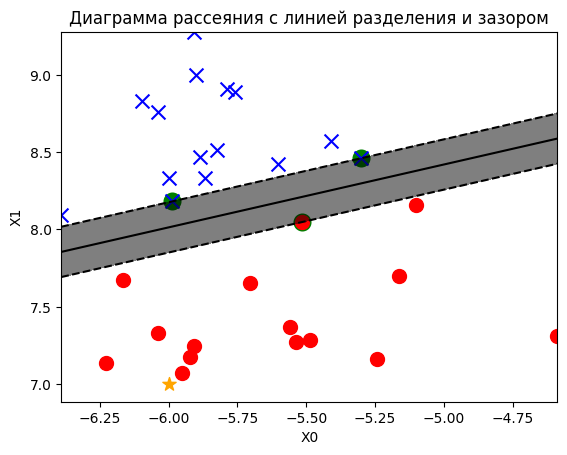

Предсказание для точки класса 1 [[-5, 9]]: [1]


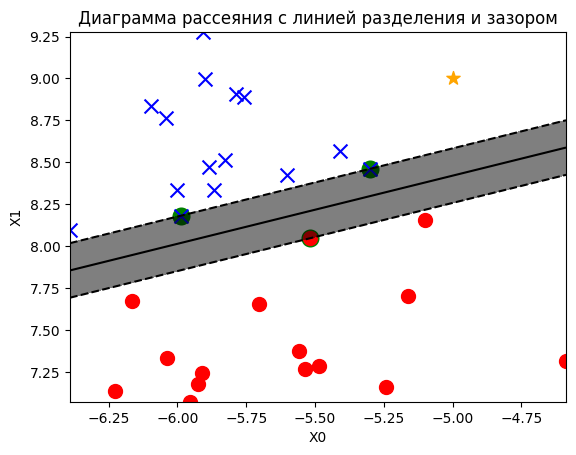

Предсказание для точки внутри зазора [[-6.25, 8]]: [1]


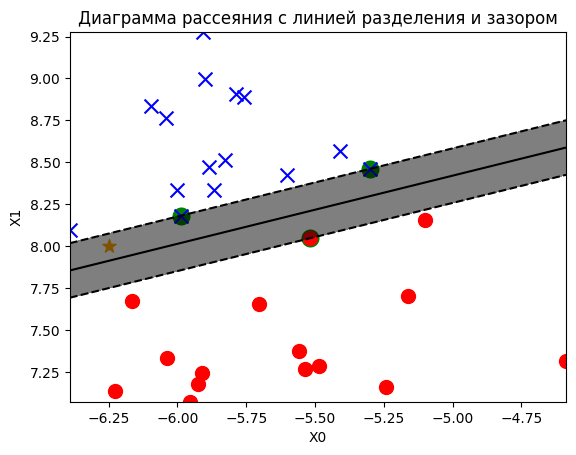

In [41]:
X, y = make_blobs(n_features=2, n_samples=30, centers=2, random_state=5, cluster_std=0.4)

svm_linear = SVC(kernel='linear', C=100)
svm_linear.fit(X, y)


# точка - класс 0
observation_class_0 = [[-6, 7]]
prediction_class_0 = svm_linear.predict(observation_class_0)
print(f"Предсказание для точки класса 0 {observation_class_0}: {prediction_class_0}")
plt.scatter(observation_class_0[0][0], observation_class_0[0][1], marker='*', s=100, color='orange')
plot_decision_regions(X, y, svm_linear)


# точка - класс 1
observation_class_1 = [[-5, 9]]
prediction_class_1 = svm_linear.predict(observation_class_1)
print(f"Предсказание для точки класса 1 {observation_class_1}: {prediction_class_1}")
plt.scatter(observation_class_1[0][0], observation_class_1[0][1], marker='*', s=100, color='orange')
plot_decision_regions(X, y, svm_linear)

# точка внутри зазора
observation_class_2 = [[-6.25, 8]]
prediction_class_2 = svm_linear.predict(observation_class_2)
print(f"Предсказание для точки внутри зазора {observation_class_2}: {prediction_class_2}")
plt.scatter(observation_class_2[0][0], observation_class_2[0][1], marker='*', s=100, color='orange')
plot_decision_regions(X, y, svm_linear)


*3. Во втором задании повторите анализ с методом опорных векторов с другими видами ядер. Сравните вид границы принятия решения и показатели точности модели.*

In [42]:
def plot_decision_regions(X, y, model, title=''):
    plt.scatter(model.support_vectors_[:, 0],model.support_vectors_[:, 1], linewidth=7, facecolors='green')

    plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
    plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

    X0 = np.linspace(X[:, 0].min(),X[:, 0].max(), X.shape[0])
    X1 = np.linspace(X[:, 1].min(),X[:, 1].max(), X.shape[0])

    X0_grid, X1_grid = np.meshgrid(X0, X1)
    Z = model.decision_function(np.array([X0_grid.ravel(), X1_grid.ravel()]).T).reshape(X0_grid.shape)
    plt.contour(X0_grid, X1_grid, Z, colors='k', levels=[-1, 0, 1], linestyles=['--', '-', '--'])
    plt.contourf(X0_grid, X1_grid, Z, colors='k', levels=[-1, 0, 1], alpha=0.5)

    plt.title(title)
    plt.xlabel('X0')
    plt.ylabel('X1')
    plt.show()

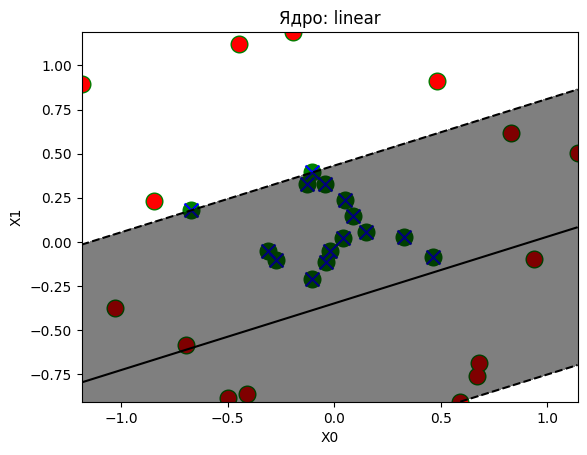

Точность для ядра linear: 0.7000


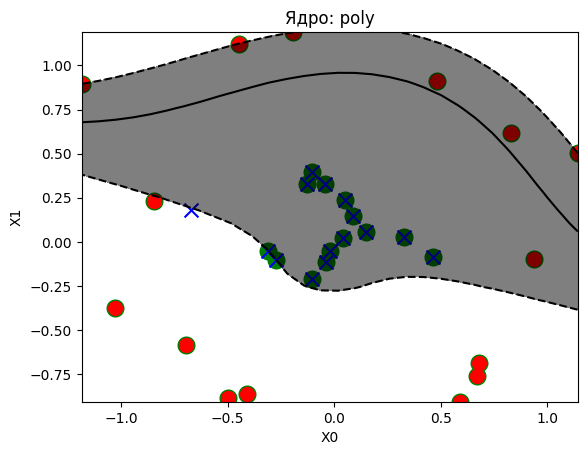

Точность для ядра poly: 0.7000


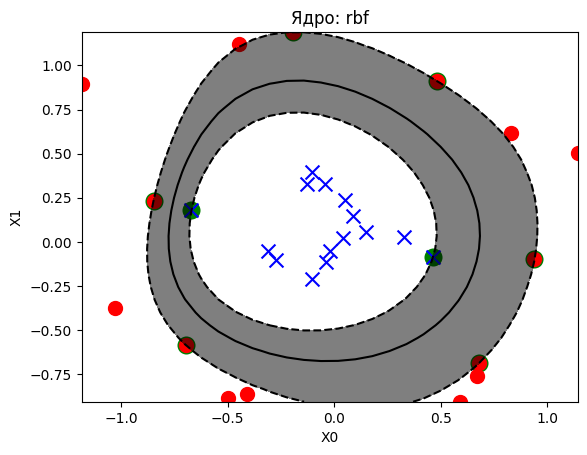

Точность для ядра rbf: 1.0000


In [43]:
X, y = make_circles(n_samples=30, random_state=5, factor=.1, noise=.2)


# Ядро: linear
svm_model = SVC(kernel='linear', C=100)
svm_model.fit(X, y)

y_pred = svm_model.predict(X)
accuracy = accuracy_score(y, y_pred)

plot_decision_regions(X, y, svm_model, title=f'Ядро: linear')
print(f"Точность для ядра linear: {accuracy:.4f}")


# Ядро: poly
svm_model = SVC(kernel='poly', C=100)
svm_model.fit(X, y)

y_pred = svm_model.predict(X)
accuracy = accuracy_score(y, y_pred)

plot_decision_regions(X, y, svm_model, title=f'Ядро: poly')
print(f"Точность для ядра poly: {accuracy:.4f}")


# Ядро: rbf
svm_model = SVC(kernel='rbf', C=100)
svm_model.fit(X, y)

y_pred = svm_model.predict(X)
accuracy = accuracy_score(y, y_pred)

plot_decision_regions(X, y, svm_model, title=f'Ядро: rbf')
print(f"Точность для ядра rbf: {accuracy:.4f}")



*4. В третьем задании поэкспериментируйте со значением аргумента C. Сделайте вывод о том, как он влияет на модель.*

In [44]:
X, y = make_blobs(n_features=2, n_samples=30, centers=2, random_state=5, cluster_std=0.7)

C_values = [0.01, 0.1, 1, 10, 100]
accuracies = []

for C in C_values:
    svm_poly = SVC(kernel='poly', degree=4, C=C)
    svm_poly.fit(X, y)

    y_pred = svm_poly.predict(X)
    acc = accuracy_score(y, y_pred)
    accuracies.append(acc)

    print(f"C: {C}, Accuracy: {acc:.4f}")


C: 0.01, Accuracy: 0.7667
C: 0.1, Accuracy: 0.7667
C: 1, Accuracy: 0.8000
C: 10, Accuracy: 0.9000
C: 100, Accuracy: 0.9000


*5. В третьем задании примените классификатор без ядра. Познакомьтесь и примените класс Linear_SVC.*

In [45]:
def plot_decision_regions(X, y, model):
    X0 = np.linspace(X[:, 0].min(), X[:, 0].max(), 300)
    X1 = np.linspace(X[:, 1].min(), X[:, 1].max(), 300)
    X0_grid, X1_grid = np.meshgrid(X0, X1)

    Z = model.decision_function(np.c_[X0_grid.ravel(), X1_grid.ravel()])
    Z = Z.reshape(X0_grid.shape)

    plt.contour(X0_grid, X1_grid, Z, colors='k', levels=[-1, 0, 1], linestyles=['--', '-', '--'])

    plt.scatter(X[:, 0][y == 0], X[:, 1][y == 0], marker="o", c='r', label='Class 0', s=100)
    plt.scatter(X[:, 0][y == 1], X[:, 1][y == 1], marker="x", c='b', label='Class 1', s=100)

    plt.contourf(X0_grid, X1_grid, Z, alpha=0.1, cmap='gray', levels=[-1, 0, 1])

    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend(loc='best')
    plt.show()

Точность модели LinearSVC: 0.8000


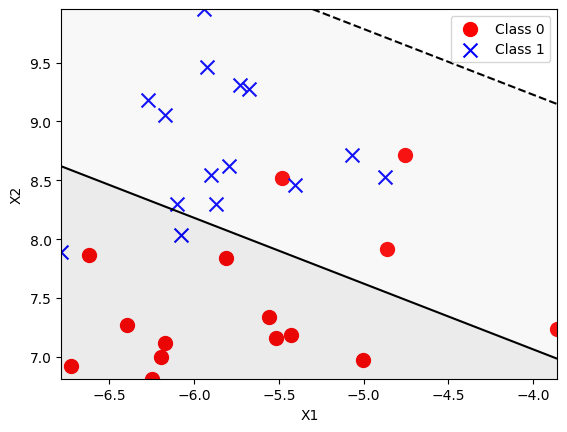

In [46]:
from sklearn.svm import LinearSVC


linear_svc = LinearSVC(C=1, max_iter=10000)
linear_svc.fit(X, y)

y_pred = linear_svc.predict(X)

accuracy = accuracy_score(y, y_pred)
print(f"Точность модели LinearSVC: {accuracy:.4f}")

plot_decision_regions(X, y, linear_svc)


*6. Сгенерируйте датасет для классификации из 1000 точек и 5 атрибутов. Попробуйте применить метод опорных векторов на нем. Найдите методом подбора наилучшее ядро и значение С.*

In [47]:
X, y = make_classification(n_samples=1000, n_features=5, random_state=42)

kernels = ['linear', 'poly', 'rbf']
C_values = [0.01, 0.1, 1, 10, 100]
best_score = 0
best_params = {}

for kernel in kernels:
    for C in C_values:
        model = SVC(kernel=kernel, C=C)
        model.fit(X, y)
        y_pred = model.predict(X)
        acc = accuracy_score(y, y_pred)

        print(f"Ядро: {kernel}, C: {C}, Точность: {acc:.4f}")

        if acc > best_score:
            best_score = acc
            best_params = {'kernel': kernel, 'C': C}

print(f"\nЛучшее ядро: {best_params['kernel']}, Лучшее C: {best_params['C']}, Лучшая точность: {best_score:.4f}")


Ядро: linear, C: 0.01, Точность: 0.8630
Ядро: linear, C: 0.1, Точность: 0.8630
Ядро: linear, C: 1, Точность: 0.8630
Ядро: linear, C: 10, Точность: 0.8630
Ядро: linear, C: 100, Точность: 0.8630
Ядро: poly, C: 0.01, Точность: 0.7720
Ядро: poly, C: 0.1, Точность: 0.8490
Ядро: poly, C: 1, Точность: 0.8720
Ядро: poly, C: 10, Точность: 0.8660
Ядро: poly, C: 100, Точность: 0.8670
Ядро: rbf, C: 0.01, Точность: 0.8680
Ядро: rbf, C: 0.1, Точность: 0.8710
Ядро: rbf, C: 1, Точность: 0.8770
Ядро: rbf, C: 10, Точность: 0.8820
Ядро: rbf, C: 100, Точность: 0.9060

Лучшее ядро: rbf, Лучшее C: 100, Лучшая точность: 0.9060


*7. Попробуйте данную модель с большим количеством точек. На каком количестве обучение начинает занимать существенное время?*

In [48]:
import time


def train_time(X, y, kernel, C):
    start_time = time.time()
    model = SVC(kernel=kernel, C=C)
    model.fit(X, y)
    end_time = time.time()
    return end_time - start_time


kernels = ['linear', 'poly', 'rbf']
C_values = [0.01, 0.1, 1, 10, 100]

sizes = [100, 500, 1000, 5000, 10000]

for size in sizes:
    X, y = make_classification(n_samples=size, n_features=5, random_state=42)

    for kernel in kernels:
        for C in C_values:
            time_taken = train_time(X, y, kernel, C)
            print(f"Количество точек: {size}, Ядро: {kernel}, C: {C}, Время обучения: {time_taken:.4f} секунд")

    print()


Количество точек: 100, Ядро: linear, C: 0.01, Время обучения: 0.0022 секунд
Количество точек: 100, Ядро: linear, C: 0.1, Время обучения: 0.0020 секунд
Количество точек: 100, Ядро: linear, C: 1, Время обучения: 0.0019 секунд
Количество точек: 100, Ядро: linear, C: 10, Время обучения: 0.0017 секунд
Количество точек: 100, Ядро: linear, C: 100, Время обучения: 0.0022 секунд
Количество точек: 100, Ядро: poly, C: 0.01, Время обучения: 0.0014 секунд
Количество точек: 100, Ядро: poly, C: 0.1, Время обучения: 0.0013 секунд
Количество точек: 100, Ядро: poly, C: 1, Время обучения: 0.0014 секунд
Количество точек: 100, Ядро: poly, C: 10, Время обучения: 0.0012 секунд
Количество точек: 100, Ядро: poly, C: 100, Время обучения: 0.0011 секунд
Количество точек: 100, Ядро: rbf, C: 0.01, Время обучения: 0.0014 секунд
Количество точек: 100, Ядро: rbf, C: 0.1, Время обучения: 0.0012 секунд
Количество точек: 100, Ядро: rbf, C: 1, Время обучения: 0.0010 секунд
Количество точек: 100, Ядро: rbf, C: 10, Время об

*8. Примените метод опорных векторов для задачи множественной классификации. Самостоятельно сгенерируйте визуализируемый датасет для этой задачи. Поробуйте изобразить границу принятия решений и зазор.*

In [49]:
def plot_decision_regions(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.contour(xx, yy, Z, levels=[0.5, 1.5, 2.5], colors='k', linestyles='--')

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=100, edgecolors='k')

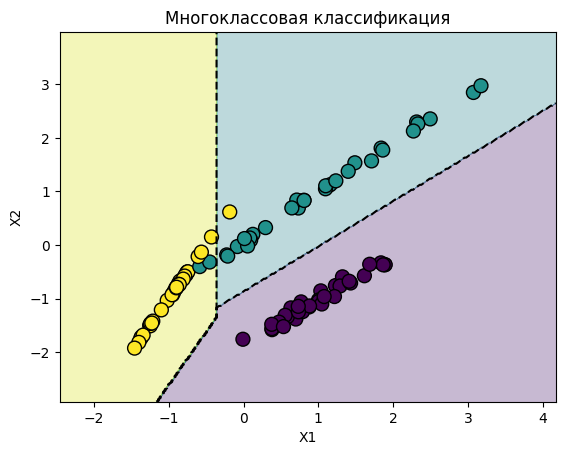

In [50]:
X, y = make_classification(n_samples=100, n_features=2, n_classes=3, n_clusters_per_class=1,
                            n_informative=2, n_redundant=0, n_repeated=0, random_state=42)
# в наборе 100 точек, 2 признака, 3 класса в задаче классификации, 1 кластер для каждого класса, 2 информативных признака

svm = SVC(kernel='linear', decision_function_shape='ovr')
svm.fit(X, y)

plot_decision_regions(X, y, svm)
plt.title("Многоклассовая классификация")
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()


*9. Выберите из библиотеки sklearn готовый датасет для классификации и попробуйте смоделировать его при помощи метода опорных векторов.*

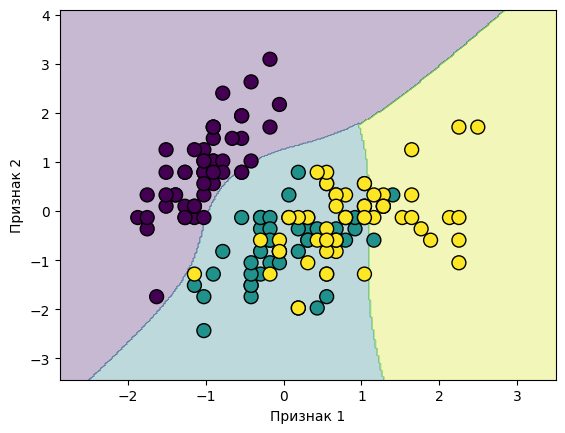

In [51]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler


iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


svm = SVC(kernel='poly')
svm.fit(X_scaled, y)


def plot_decision_regions(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=100, edgecolors='k')
    plt.xlabel('Признак 1')
    plt.ylabel('Признак 2')
    plt.show()


plot_decision_regions(X_scaled, y, svm)


*10. Повторите такой же анализ для задачи регрессии и соответствующего датасета.*

In [52]:
from sklearn.svm import SVR

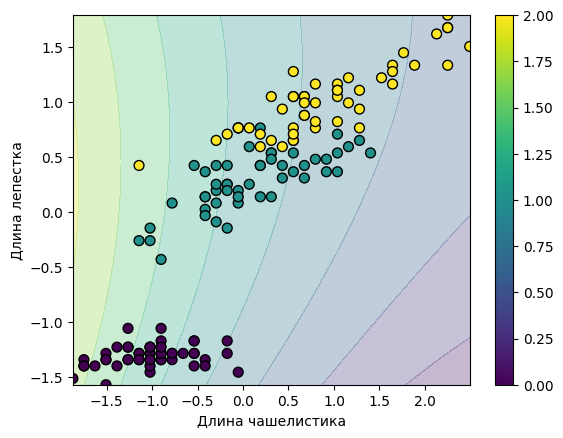

In [53]:
iris = datasets.load_iris()
X = iris.data[:, [0, 2]]  # длина чашелистика и длина лепестка
y = iris.target  # метки классов как целевые переменные

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

svr = SVR(kernel='poly')
svr.fit(X_scaled, y)


def plot_regression(X, y, model):
    x1_range = np.linspace(X[:, 0].min(), X[:, 0].max(), 300)
    x2_range = np.linspace(X[:, 1].min(), X[:, 1].max(), 300)
    X1, X2 = np.meshgrid(x1_range, x2_range)
    X_range = np.c_[X1.ravel(), X2.ravel()]
    X_range_scaled = scaler.transform(X_range)

    y_pred = model.predict(X_range_scaled)
    y_pred = y_pred.reshape(X1.shape)

    plt.contourf(X1, X2, y_pred, alpha=0.3, cmap='viridis')
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolors='k', cmap='viridis')
    plt.xlabel('Длина чашелистика')
    plt.ylabel('Длина лепестка')
    plt.colorbar()
    plt.show()


plot_regression(X_scaled, y, svr)
